In [1]:
# Notebook para exploração inicial dos datasets "Meteorite Landings" e "Meteorite Landings on Earth"
import pandas as pd
import numpy as np
import math


df1 = pd.read_csv("datasets/meteorite_landings.csv", on_bad_lines='warn') # Dataset 1: Meteorite Landings
df1.head(3) # pra vcs checarem as variáveis

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"


In [84]:
df2 = pd.read_csv("datasets/meteorite_landings_on_earth.csv", on_bad_lines='warn') # Dataset 2: Meteorite Landings on Earth
df2.head(3)

,Unnamed: 0,id,meteorite_name,nametype,recclass,fall,year,mass,location,location_code,location_type,distance,latitude,longitude,lat_lng
0,1,1,Aachen,Valid,L5,Fell,1880.0,21.0,Germany,DE,land,0.0,50.7750,6.0833,"50.775,6.0833"
1,2,2,Aarhus,Valid,H6,Fell,1951.0,720.0,Denmark,DK,land,0.0,56.1833,10.2333,"56.1833,10.2333"
2,3,6,Abee,Valid,EH4,Fell,1952.0,107000.0,Canada,CA,land,0.0,54.2167,-113.0000,"54.2167,-113"


- Aqui faremos uma verificação do ano em que o meteorito foi descoberto, pois existem algumas incoerências. 
  
  Faremos essa verificação utilizando como base o site [The Meteoritical Society](https://www.lpi.usra.edu/meteor/metbull.php).
  

In [ ]:

years_bug = [i for i in df1['year'] if i >= 2016 or i <= 860 ] # pega os anos incoerentes

index_bug = [i for i in df1.index if df1.loc[i, 'year'] in years_bug] # pega os índices dos elementos problemáticos 

name_years_bug = [df1['name'].loc[i] for i in df1.index if df1.loc[i, 'year'] in years_bug] # pega o nome dos elementos para a verificação no site

print(name_years_bug)
index_bug


['Nogata', 'Havana', 'Northwest Africa 7701', 'Ur', 'Wietrzno-Bobrka']


[703, 16356, 30679, 38188, 38301]

- Agora vamos corrigir as informações no dataframe:

In [31]:
df1.loc[703,'year'] = 861
df1.loc[16356,'year'] = -300
df1.loc[30679,'year'] = 2010
df1.loc[38188, 'year'] = -2500 # '-' possivelmente significa antes de cristo
df1.loc[38301,'year'] = -600

# De acordo com os autores do dataset, esses anos são "anos antes de cristo"

# Dataset 1

## Variável 'mass'

### Calculando as medidas de centralidade da variável 'mass'

- Média

In [13]:
#remove os valores nan antes de calcular a média na coluna 'mass'
media_massa = np.nanmean(df1['mass'])
media_massa

13278.078548601516

- Mediana

In [106]:
mediana_massa = np.median(df1.sort_values(by='mass').dropna()['mass'])
mediana_massa

29.09

### Agora calculando as medidas de dispersão da variável 'mass'

- Variância

In [110]:
var_massa = np.var(df1['mass'])

var_massa

330604955342.3177

- Desvio Padrão

In [111]:
desvio_massa = math.sqrt(var_massa)
desvio_massa

574982.5695986946

- Moda

In [44]:
moda_massa = df1['mass'].mode()
moda_massa

0    1.3
Name: mass, dtype: float64

- Boxplot

(1.0, 60000000.0)

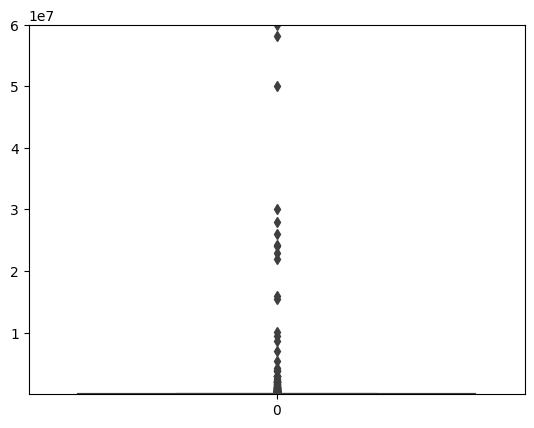

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline   #ainda não resolvido

sns.boxplot(df1['mass'])
plt.ylim([1, 60000000])






## Variável 'year'

### Calculando as medidas de centralidade da variável 'year'

- Média

In [95]:
media_anos = int(np.nanmean(df1['year']))
media_anos


1991

- Mediana

In [39]:
(df1.sort_values(by='year', ascending=False).dropna()['year']).median()



1996.0

- Moda

In [108]:
moda_anos = int(df1['year'].mode(dropna='True'))
moda_anos

0    2003.0
Name: year, dtype: float64

### Calculando as medidas de dispersão da variável 'year'

- Variância

In [64]:
var_anos = np.var(df1['year'])
var_anos 

1334.87558056314

- Desvio Padrão

In [65]:
desvio_anos = math.sqrt(var_anos)
desvio_anos 

36.535949153718995

Medidas de centralidade do Df1

- Medianas

In [43]:
print((df1.sort_values(by='year', ascending=False).dropna()['year']).median()) # mediana de 'year'

print((df1.sort_values(by='mass', ascending=False).dropna()['mass']).median()) # mediana de 'mass'

1996.0
29.09


- Médias

In [5]:
df1.mean(numeric_only='True')

id         26889.735104
mass       13278.078549
year        1991.772189
reclat       -39.122580
reclong       61.074319
dtype: float64

- Modas

In [13]:
df1.mode(numeric_only='True', dropna='True')[['mass', 'year']].head(1)

,mass,year
0,1.3,2003.0


Medidas de Dispersão do Df1

- Desvio-padrão

In [66]:
df1.std(numeric_only=True).dropna()

id          16860.683030
mass       574988.876410
year           36.536351
reclat         46.378511
reclong        80.647298
dtype: float64

- Variâncias

In [60]:
df1.var(numeric_only=True).dropna()

id         2.842826e+08
mass       3.306122e+11
year       1.334905e+03
reclat     2.150966e+03
reclong    6.503987e+03
dtype: float64